First Demo first class... **Majed Al-Ghandour**

In [1]:
#Comment line for print hello
print("Hello NGA...Class")
print("World", "Hello", sep="?")

Hello NGA...Class
World?Hello


In [2]:
#!pip install seaborn

From Seaborn URL Tutorials

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

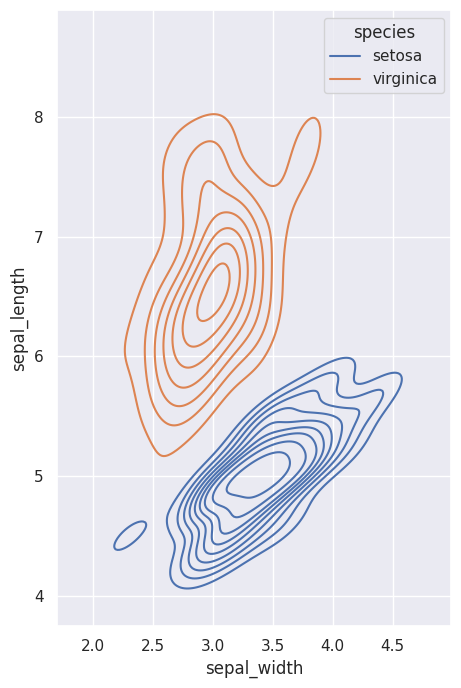

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
iris = sns.load_dataset("iris")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=iris.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,
)


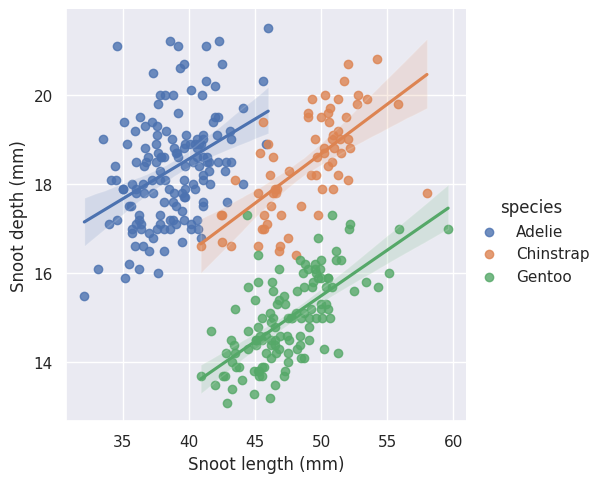

In [4]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

Code citied for practice:
https://www.datacamp.com/tutorial/normalization-in-machine-learning


To be used for min-max normalization

To be used for Z-normalization (standardization)

In [5]:
import numpy as np
import pandas as pd
# To import the dataset
from sklearn.datasets import load_iris
# To be used for splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
# To be used for min-max normalization
from sklearn.preprocessing import MinMaxScaler
# To be used for Z-normalization (standardization)
from sklearn.preprocessing import StandardScaler

# Load the iris dataset from Scikit-learn package
iris = load_iris()

# This prints a summary of the characteristics, statistics of the dataset
print(iris.DESCR)

# Divide the data into features (X) and target (Y)
# Data is converted to a panda’s dataframe
X = pd.DataFrame(iris.data)

# Separate the target attribute from rest of the data columns
Y = iris.target

# Take a look at the dataframe
print(X.head())

# This prints the shape of the dataframe (150 rows and 4 columns)
print(X.shape)

print(X.describe())

print(X.info())

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# To divide the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [7]:
# Good practice to keep original dataframes untouched for reusability
X_train_n = X_train.copy()
X_test_n = X_test.copy()

# Fit min-max scaler on training data: Xnormalized = X – Xmin / Xmax – Xmin
norm = MinMaxScaler().fit(X_train_n)

# Transform the training data
X_train_norm = norm.transform(X_train_n)

# Use the same scaler to transform the testing set
X_test_norm = norm.transform(X_test_n)

In [8]:
X_train_norm_df = pd.DataFrame(X_train_norm)

     	# Assigning original feature names for ease of read
X_train_norm_df.columns = iris.feature_names

X_train_norm_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,0.416898,0.445486,0.463889,0.434375
std,0.227314,0.189583,0.306477,0.312723
min,0.000000,0.000000,0.000000,0.000000
25%,0.215278,0.333333,0.100877,0.083333
50%,0.402778,0.416667,0.561404,0.500000
75%,0.583333,0.541667,0.719298,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [9]:
X_train_s = X_train.copy()
X_test_s = X_test.copy()

# Fit the standardization scaler onto the training data
stan = StandardScaler().fit(X_train_s)

# Transform the training data
X_train_stan = stan.transform(X_train_s)

# Use the same scaler to transform the testing set
X_test_stan = stan.transform(X_test_s)

     	# Convert the transformed data into pandas dataframe
X_train_stan_df = pd.DataFrame(X_train_stan)

     	# Assigning original feature names for ease of read
X_train_stan_df.columns = iris.feature_names

     	# Check out the statistical description
X_train_stan_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,1.173136e-15,6.291264e-16,5.921189e-17,2.294461e-16
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.841711e+00,-2.359672e+00,-1.519963e+00,-1.394831e+00
25%,-8.906885e-01,-5.940562e-01,-1.189432e+00,-1.127237e+00
50%,-6.237887e-02,-1.526522e-01,3.195131e-01,2.107298e-01
75%,7.352526e-01,5.094538e-01,8.368656e-01,8.797135e-01
max,2.575941e+00,2.937176e+00,1.756603e+00,1.816291e+00


#AMTRAK DATA

In [10]:
#import piplines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from google.colab import files
uploaded = files.upload()

Saving Amtrak.csv to Amtrak.csv


In [12]:
#read into dataframe
#/content/Amtrak.csv
Amtrak_df = pd.read_csv('/content/Amtrak.csv')


In [13]:
Amtrak_df.head()

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


Descriptive Analytics

In [14]:
print(Amtrak_df.shape)
print(Amtrak_df.info())
print(Amtrak_df.describe())

(159, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      159 non-null    object 
 1   Ridership  159 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB
None
         Ridership
count   159.000000
mean   1822.197208
std     181.636034
min    1360.852000
25%    1698.564500
50%    1831.049000
75%    1966.957500
max    2223.349000


In [15]:
Amtrak_df.tail()

,Month,Ridership
154,01/11/2003,2076.054
155,01/12/2003,2140.677
156,01/01/2004,1831.508
157,01/02/2004,1838.006
158,01/03/2004,2132.446


Check numeric and object variables

In [16]:
numericdf=Amtrak_df.select_dtypes(include=['int64','float64'])
print(numericdf.columns)

objectdf=Amtrak_df.select_dtypes(include=['object'])
print(objectdf.columns)

print(Amtrak_df.columns)


Index(['Ridership'], dtype='object')
Index(['Month'], dtype='object')
Index(['Month', 'Ridership'], dtype='object')


Check for missing data

In [17]:
Amtrak_df.isnull().sum()


Month        0
Ridership    0
dtype: int64

In [18]:
Amtrak_df.corr(numeric_only=True)

,Ridership
Ridership,1.0


Histogram

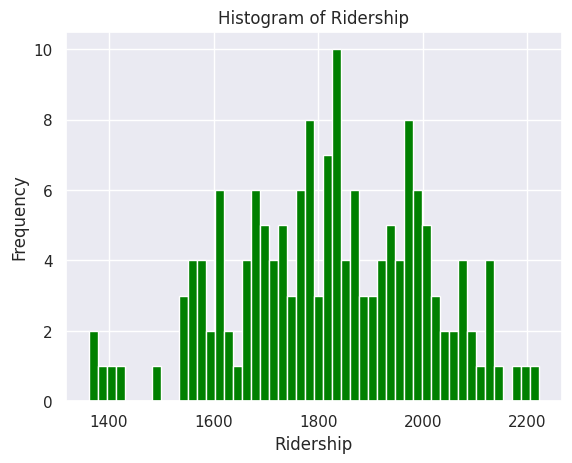

In [19]:
plt.hist(Amtrak_df['Ridership'],bins=50, facecolor='green')
plt.xlabel('Ridership')
plt.ylabel('Frequency')
plt.title('Histogram of Ridership')
plt.show()

Boxplot

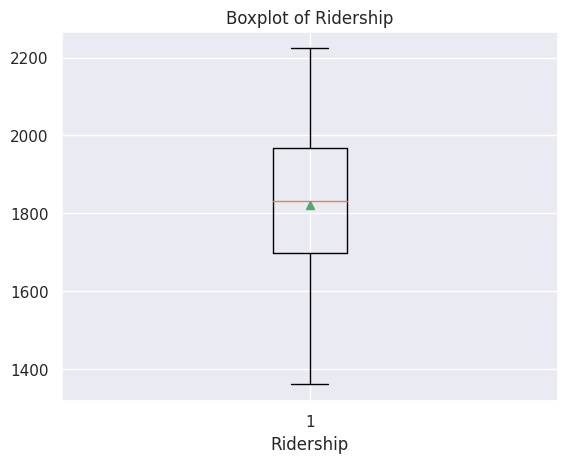

In [20]:
#plt.boxplot(Amtrak_df['Ridership'])
plt.boxplot(Amtrak_df['Ridership'],showmeans=True)
plt.xlabel('Ridership')
plt.title('Boxplot of Ridership')
plt.show()

skewness

In [21]:
#call library scipy
from scipy.stats import skew
print(skew(Amtrak_df['Ridership']))

-0.19444005035728598


skewness <0 means skew to the right

<Axes: >

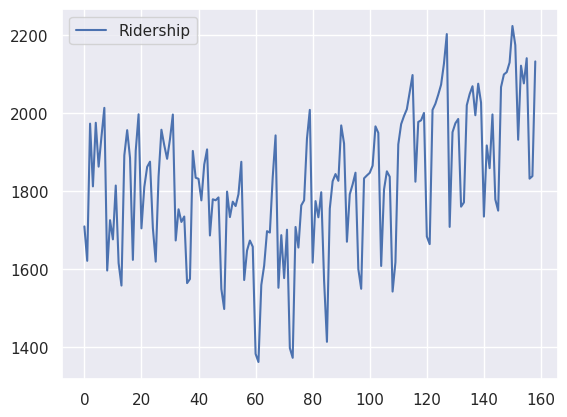

In [22]:
Amtrak_df.plot()

(2000.0, 2400.0)

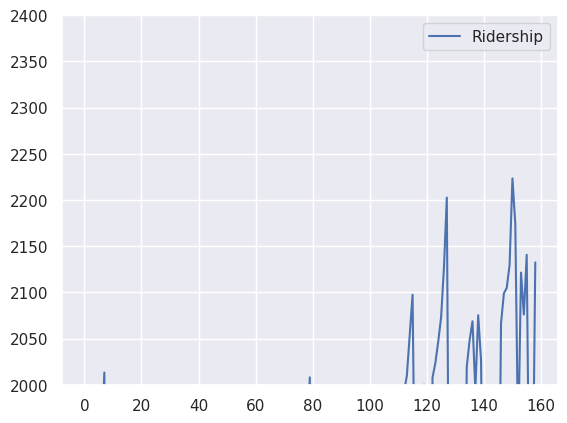

In [23]:
#limits
Amtrak_df.plot()
plt.ylim(2000,2400)

<Axes: xlabel='Ridership', ylabel='Density'>

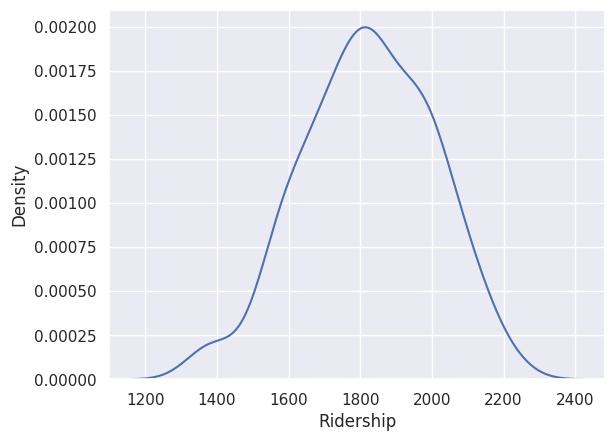

In [24]:
#density curve
import seaborn as sns
sns.kdeplot(Amtrak_df['Ridership'])

<Axes: xlabel='Ridership', ylabel='Count'>

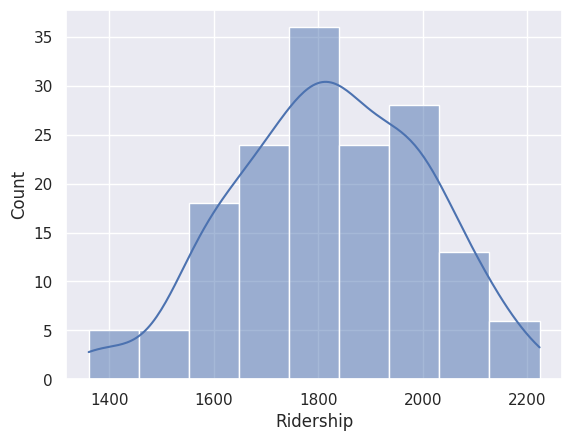

In [25]:
sns.histplot(Amtrak_df['Ridership'], kde=True)

#PCA

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.preprocessing import scale
import plotly.express as ex


In [30]:
#print today date and time
from datetime import datetime
print(datetime.now())

2024-07-19 18:08:42.182042


In [31]:
#read iris from ploty
df = ex.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [33]:
print(df.shape)
print(df.info())
print (df.describe())
print(df.columns)

(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
       sepal_length  sepal_width  petal_length  petal_width  species_id
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    2.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    1.000000
25%        5.100000     2.800000      1.600000     0.300000    1.000000
50%        5.800000     3.000000      4.3500

In [35]:
#missing any values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_id      0
dtype: int64

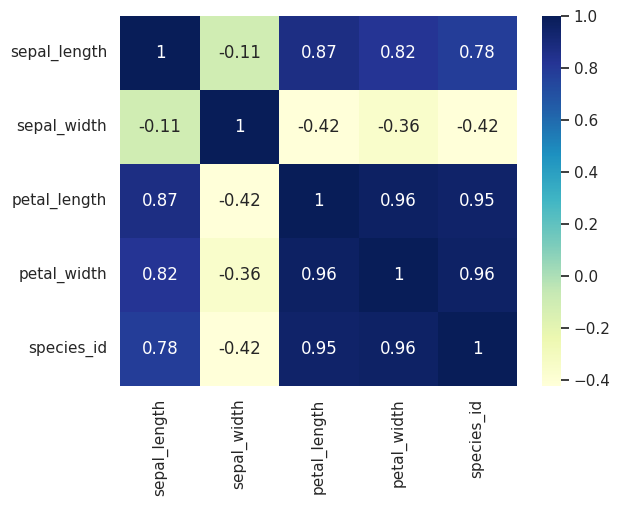

In [53]:
df.corr(numeric_only=True)
dataplot=sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

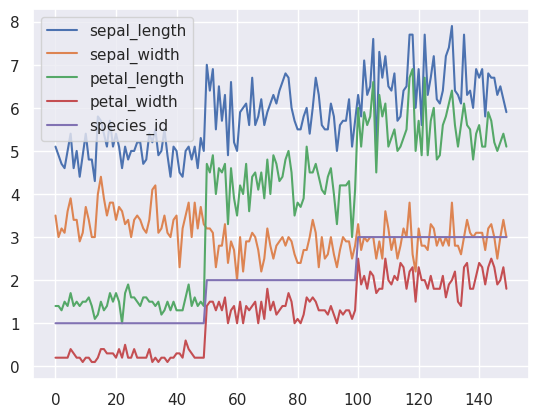

In [54]:
p=df.plot()

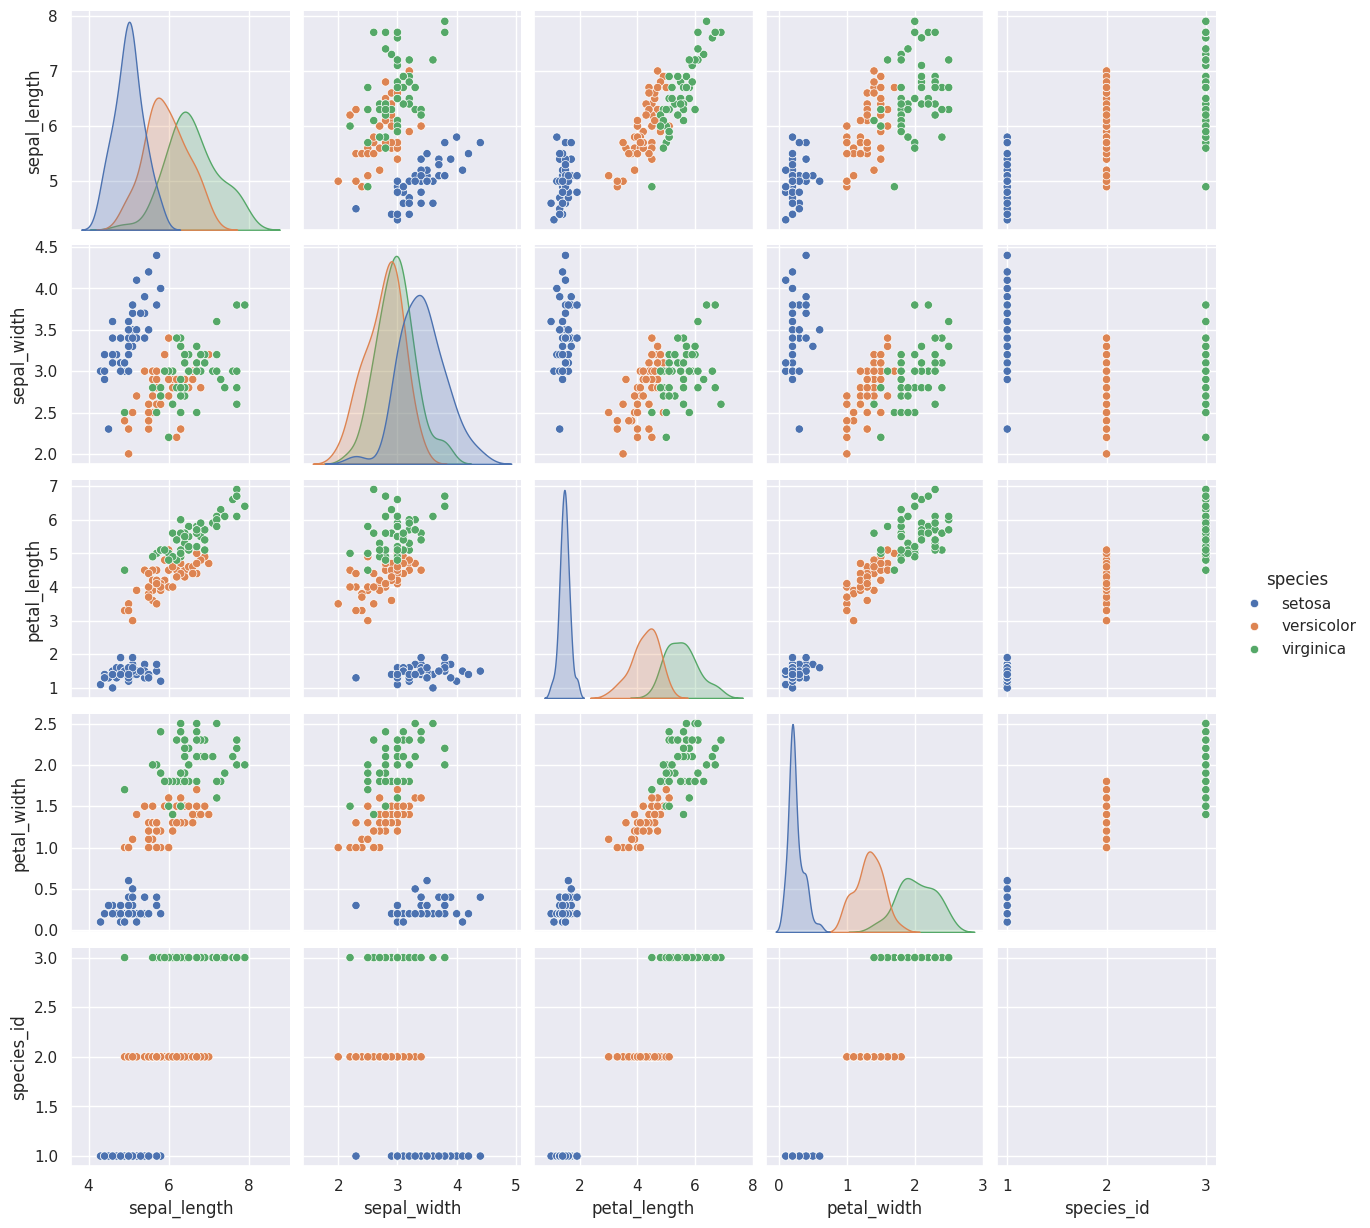

In [56]:
irispair=sns.pairplot(df, hue="species")

In [38]:
X1=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X1

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
X1=scale(X1)
X1

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [49]:
pca=PCA(n_components=2)
pca.fit(X1)
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]


72% variablity in the data from first comp. Two comp. capture 95% variablity in the data.

In [50]:
#plot
pca=pca.transform(X1)
print(pca)
fig=ex.scatter(pca,x=0, y=1, color=df['species'])
fig.show()

[[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156e+00  1.06750793e-01]
 [-2.22821750e+00  1.62186163e-01]
 [-1.95702401e+00 -6.07892567e-01]
 [-2.05206331e+00  2.66014312e-01]
 [-2.16819365e+00  5.52016495e-01]
 [-2.14030596e+00  3

#MLR Insurance

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



In [58]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [64]:
#/content/insurance.csv
df=pd.read_csv('/content/insurance.csv')

In [65]:
#descriptive
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1333.000000,1338.000000,1338.000000
mean,39.207025,30.658545,1.094918,13270.422265
std,14.049960,6.092785,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [66]:
#missing
df.isnull().sum()

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

In [67]:
#Munging the data with strategy filling with mean values option
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [75]:
#extract these objects
sex=df['sex']
smoker=df['smoker']
region=df['region']

In [76]:
print(sex.head())
print(smoker.head())
print(region.head())

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object
0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
Name: region, dtype: object


In [77]:
print(sex.unique())
print(smoker.unique())
print(region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [78]:
#encode sex
le=LabelEncoder()
sex_encoded=le.fit_transform(sex)
print(sex_encoded)

[0 1 1 ... 0 0 0]


In [79]:
#smoker
smoker_encoded=le.fit_transform(smoker)
print(smoker_encoded)

[1 0 0 ... 0 0 1]


In [81]:
#region
ohe=OneHotEncoder()
region_encoded=ohe.fit_transform(region.values.reshape(-1,1)).toarray()
print(region_encoded)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [82]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [87]:
#merge back to original df
X_num=df[['age', 'bmi', 'children']]
X_final=np.concatenate((X_num,sex_encoded.reshape(-1,1),smoker_encoded.reshape(-1,1),region_encoded),axis=1)
print(X_final)
print(type(X_final))
#

[[19.   27.9   0.   ...  0.    0.    1.  ]
 [18.   33.77  1.   ...  0.    1.    0.  ]
 [28.   33.    3.   ...  0.    1.    0.  ]
 ...
 [18.   36.85  0.   ...  0.    1.    0.  ]
 [21.   25.8   0.   ...  0.    0.    1.  ]
 [61.   29.07  0.   ...  1.    0.    0.  ]]
<class 'numpy.ndarray'>


In [89]:
y_final=df['charges']
print(y_final)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [91]:
print(X_train.shape)
print(X_test.shape)

(1070, 9)
(268, 9)


In [92]:
#Develop MLR
model=LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[ 2.57546503e+02  3.28377323e+02  4.21164693e+02 -1.50503789e+00
  2.36577292e+04  4.33705363e+02  7.09216049e+01 -1.58565481e+02
 -3.46061486e+02]
-12151.254727487312


In [93]:
#performance
print(model.score(X_train, y_train))   #80 %
print(model.score(X_test, y_test))     #20%


0.7402874650182243
0.7833990542354089


In [96]:
X_test

array([[45.   , 25.175,  2.   , ...,  0.   ,  0.   ,  0.   ],
       [36.   , 30.02 ,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [64.   , 26.885,  0.   , ...,  1.   ,  0.   ,  0.   ],
       ...,
       [38.   , 28.025,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [54.   , 47.41 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [51.   , 34.2  ,  1.   , ...,  0.   ,  0.   ,  1.   ]])

In [97]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [94]:
#predict
print(model.predict(X_test))

[ 8.98127178e+03  7.04922824e+03  3.68887966e+04  9.48286926e+03
  2.69510787e+04  1.07663117e+04  2.06465875e+02  1.68482805e+04
  1.17139665e+03  1.12225800e+04  2.81612038e+04  9.36496018e+03
  5.29687808e+03  3.83638168e+04  4.02363942e+04  3.70804319e+04
  1.51674320e+04  3.59022207e+04  9.16946755e+03  3.14803200e+04
  3.89388282e+03  1.01231085e+04  2.37723294e+03  7.01953306e+03
  1.12944565e+04  1.29213327e+04  1.44815180e+04  6.11958718e+03
  9.96430248e+03  2.22180434e+03  9.11065826e+03  1.30504259e+04
  4.54917363e+03  3.46068366e+03  4.46987223e+03  1.29415976e+04
  2.00148638e+03  8.81683009e+03  3.33147237e+04  3.25981245e+04
  3.89348226e+03  4.29997869e+03  1.41023608e+04  1.14738922e+04
  8.76952806e+03  1.21479635e+04  5.21380222e+03  3.18440941e+03
  3.54961300e+04  9.12135119e+03  1.58357063e+04  2.39011849e+03
  1.22440804e+04  1.49564023e+03  1.34173102e+04  1.25447960e+04
  4.36782735e+03  3.21162228e+04  1.33096704e+04  1.28509613e+04
  1.41705124e+04  1.04185

In [102]:
#Method 2 OLS (Ordinary Least Squares Regression)
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_train_sm

model_sm=sm.OLS(y_train,X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     378.0
Date:                Fri, 19 Jul 2024   Prob (F-statistic):          2.50e-304
Time:                        20:22:14   Log-Likelihood:                -10848.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.176e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9721.0038    891.594    -10.903      0.0

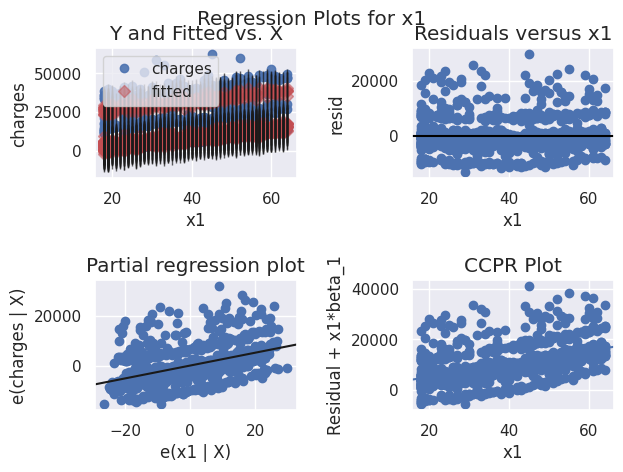

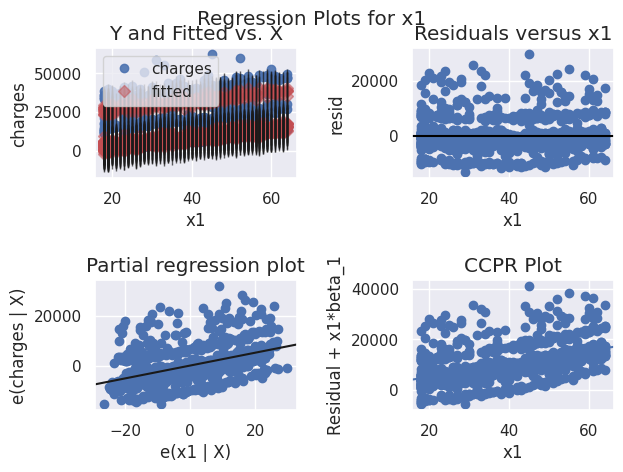

In [109]:
#plot residuals

sm.graphics.plot_regress_exog(model_sm, 'x1')

In [114]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

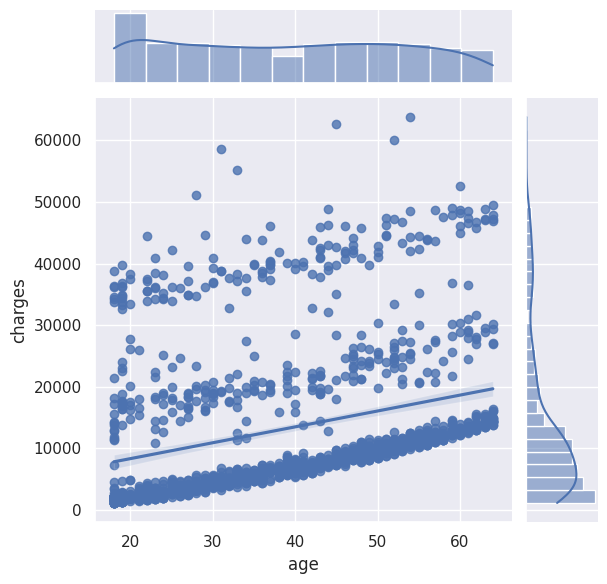

In [113]:
#plots sns
sns.jointplot(x='age', y='charges', data=df, kind='reg')

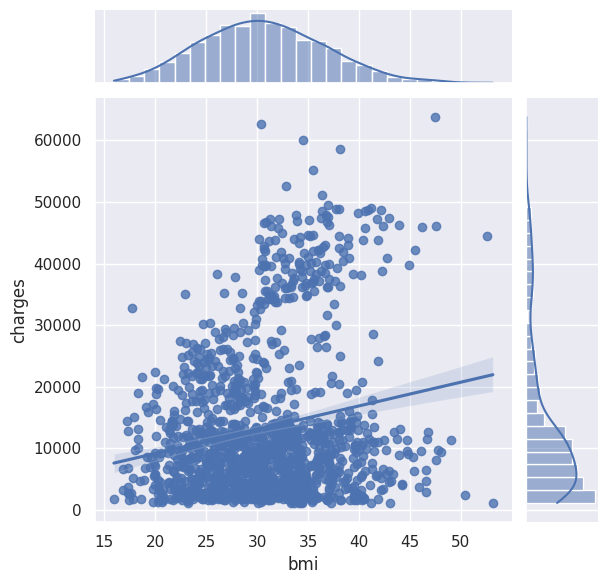

In [115]:
#plots sns
sns.jointplot(x='bmi', y='charges', data=df, kind='reg')